In [114]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from typing import Dict, List
%matplotlib inline

In [115]:
def extract_bill_atm() -> pd.DataFrame:
    df = pd.read_csv("data/1 raw/UCI_Credit_Card_BillATM.csv", index_col=0 ,na_values={"LIMIT_BAL": ["-"]})

    return df

def transform_bill_atm(df: pd.DataFrame) -> pd.DataFrame:
    df["LIMIT_BAL"] = df["LIMIT_BAL"].astype(np.float32, errors="ignore")
    df["SEX"] = df["SEX"].astype("category")

    df.set_index("ID", inplace=True)
    df.sort_index(inplace=True)
    df.drop_duplicates(inplace=True) # ID 1 and 26 is duplicated
    return df



df_bill_extract = extract_bill_atm()
df_bill_transform = transform_bill_atm(df=df_bill_extract)
df_bill_transform.head()



,LIMIT_BAL,SEX,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,,,
1,20000.0,female,3913.0,3102.0,689.0,0.0,0.0,0.0
2,120000.0,NaN,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
3,90000.0,female,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
4,50000.0,female,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
5,50000.0,male,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0


In [116]:
def extract_pay() -> pd.DataFrame:
    filename = "data/1 raw/UCI_Credit_Card_Pay.csv"
    df = pd.read_csv(filename, index_col=0, na_values={"LIMIT_BAL": ["-"]})
    return df

def transform_pay(df: pd.DataFrame) -> pd.DataFrame:
    df["LIMIT_BAL"] = df["LIMIT_BAL"].astype(np.float32, errors="ignore")
    df["AGE"] = df["AGE"].str.extract('(\d+)').astype(float, errors="ignore")

    df.set_index("ID", inplace=True)
    df.sort_index(inplace=True)
    df.drop_duplicates(inplace=True) # ID 1 and 26 is duplicated
    return df



df_pay_extract = extract_pay()
df_pay_transform = transform_pay(df=df_pay_extract)
df_pay_transform.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
ID,,,,,,,,
1,20000.0,NaN,2,2,-1,-1,-2,-2
2,120000.0,26.0,-1,2,0,0,0,2
3,90000.0,34.0,0,0,0,0,0,0
4,50000.0,37.0,0,0,0,0,0,0
5,50000.0,57.0,-1,0,-1,0,0,0


In [141]:
def extract_pay_atm() -> pd.DataFrame:
    df = pd.read_csv("data/1 raw/UCI_Credit_Card_PayATM.csv", index_col=0,  na_values={"LIMIT_BAL": ["-"], "EDUCATION": ["Null"]})
    return df

def transform_pay_atm(df: pd.DataFrame) -> pd.DataFrame:
    df["LIMIT_BAL"] = df["LIMIT_BAL"].astype(np.float32, errors="ignore")

    df.set_index("ID", inplace=True)
    df.sort_index(inplace=True)
    df.drop_duplicates(inplace=True) # ID 1 and 26 is duplicated
    return df



df_pay_atm_extract =  extract_pay_atm()
df_pay_atm_transform = transform_pay_atm(df=df_pay_atm_extract)
df_pay_atm_transform["EDUCATION"].unique()

array([ 2., nan,  1.,  3.,  5.])

In [118]:
def extract_pay_next() -> pd.DataFrame:
    df = pd.read_csv("data/1 raw/UCI_Credit_Card_PayNextMonth.csv", index_col=0, na_values={"SEX": ["Nan"]})
    return df

def transform_pay_next(df: pd.DataFrame) -> pd.DataFrame:

    df.loc[df["SEX"] == 1.0, "SEX"] = "male"
    df.loc[df["SEX"] == 2.0, "SEX"] = "female"

    df["SEX"] = df["SEX"].astype("category")


    df.set_index("ID", inplace=True)
    df.sort_index(inplace=True)
    df.drop_duplicates(inplace=True) # ID 1 y 6 is duplicated
    return df



df_pay_next_extract =  extract_pay_next()
df_pay_next_transform = transform_pay_next(df=df_pay_next_extract)
df_pay_next_transform.head()


,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
ID,,,,,
1,female,2.0,1,24.0,1
2,female,2.0,2,26.0,1
3,female,2.0,2,34.0,0
4,female,NaN,1,37.0,0
5,male,2.0,1,57.0,0


In [185]:
data = {
    "bill_atm": df_bill_transform,
    "card_pay": df_pay_transform,
    "card_pay_atm": df_pay_atm_transform,
    "card_pay_next": df_pay_next_transform,
}


def get_nan_cols(data: Dict[str, pd.DataFrame]) -> List[str]:
    nan_cols = []
    for key, value in data.items():
        
        na = [col for col in value.columns if value[col].isnull().sum()   > 0]
        nan_cols.extend(na)
    nan_cols = list(set(nan_cols))

    return nan_cols




def transform_combine(data: Dict[str, pd.DataFrame]) ->  pd.DataFrame:
    df = None
    for key in data.keys():
        
        if df is None:
            df = data[key]
        else:
            df = df.combine_first(data[key])
    return df

    
def transform_rename(df:  pd.DataFrame) ->  pd.DataFrame:

    df = df.rename(columns={"PAY_0": "PAY_1", "default.payment.next.month": "DEFAULT"})
    df.columns = [c.lower().replace(" ", "_") for c in df.columns]
    return df


df_combine = transform_combine(data=data)
df_rename = transform_rename(df=df_combine)

df_rename.head()


    


,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,education,limit_bal,marriage,...,pay_5,pay_6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sex,default
ID,,,,,,,,,,,,,,,,,,,,,
1,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,2.0,20000.0,1.0,...,-2,-2,0.0,689.0,0.0,0.0,0.0,0.0,female,1.0
2,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,2.0,120000.0,2.0,...,0,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,female,1.0
3,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,2.0,90000.0,2.0,...,0,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,female,0.0
4,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,50000.0,1.0,...,0,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,female,0.0
5,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2.0,50000.0,1.0,...,0,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,male,0.0


In [186]:
def transform_age_bining(df: pd.DataFrame) -> pd.DataFrame:
    
    bins = [20, 30, 40, 50,60, 70, 80, 90, 100]
    labels = [ '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    df["age_by_bin"] = pd.cut(df["age"], bins, labels=labels, right=True)
    
    return df


df = transform_age_bining(df_rename)
df.head()

,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,education,limit_bal,marriage,...,pay_6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,sex,default,age_by_bin
ID,,,,,,,,,,,,,,,,,,,,,
1,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,2.0,20000.0,1.0,...,-2,0.0,689.0,0.0,0.0,0.0,0.0,female,1.0,21-30
2,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,2.0,120000.0,2.0,...,2,0.0,1000.0,1000.0,1000.0,0.0,2000.0,female,1.0,21-30
3,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,2.0,90000.0,2.0,...,0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,female,0.0,31-40
4,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,50000.0,1.0,...,0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,female,0.0,31-40
5,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2.0,50000.0,1.0,...,0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,male,0.0,51-60


<AxesSubplot: xlabel='marriage'>

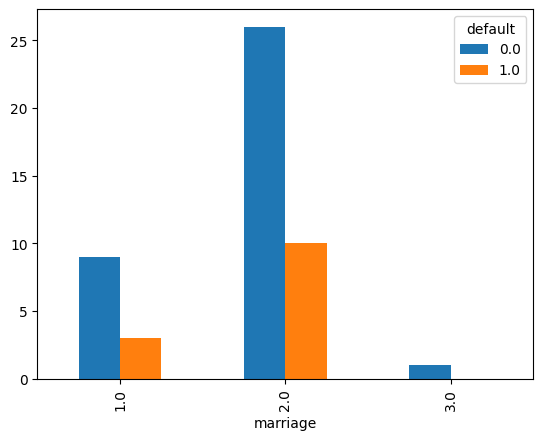

In [194]:
pd.crosstab(df.marriage, df.default).plot(kind='bar')

In [ ]:

pd.crosstab(df.age_by_bin, df.sex).plot(kind='bar')